In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
price = pd.read_csv('PricesBoredApeYachtClub.csv')

In [121]:
price__ = pd.read_csv('PricesBoredApeYachtClub.csv')
price__

,ID,Price,Symbol
0,6,669.00,ETH
1,8,300.00,ETH
2,9,200.00,ETH
3,17,474.00,ETH
4,26,420.69,ETH
...,...,...,...
727,9774,315.00,ETH
728,9789,149.69,ETH
729,9790,160.00,ETH
730,9815,380.00,ETH


In [26]:
price_doodles = pd.read_csv('DoodlesPrices.csv')

In [27]:
price_doodles

,Unnamed: 0,ID,Price,Symbol
0,0,9,35.6900,ETH
1,1,10,40.0000,ETH
2,2,13,32.0000,ETH
3,3,22,29.1000,ETH
4,4,30,0.0003,WETH
...,...,...,...,...
665,665,9949,25.5000,ETH
666,666,9968,29.0000,ETH
667,667,9975,30.0000,ETH
668,668,9991,24.9900,ETH


In [133]:
if ('Unnamed: 0') in price_doodles.columns.tolist():
    price_doodles.drop(['Unnamed: 0'], axis=1, inplace=True)

In [134]:
price_doodles

,ID,Price,Symbol
0,9,35.6900,ETH
1,10,40.0000,ETH
2,13,32.0000,ETH
3,22,29.1000,ETH
4,30,0.0003,WETH
...,...,...,...
665,9949,25.5000,ETH
666,9968,29.0000,ETH
667,9975,30.0000,ETH
668,9991,24.9900,ETH


In [4]:
#convertion rates
eth_dol = 2826
weth_dol = 2803
ape_dol = 14.67

In [5]:
#finding in the df all the values that corresponds to the 3 uniques currency symbols
price_eth = price['Symbol'] == 'ETH'
price_weth = price['Symbol'] == 'WETH'
price_ape = price['Symbol'] == 'APE'

In [6]:
price.loc[price_eth, 'Price'] = price.loc[price_eth, 'Price'] * eth_dol
price.loc[price_weth, 'Price'] = price.loc[price_weth, 'Price'] * weth_dol
price.loc[price_ape, 'Price'] = price.loc[price_ape, 'Price'] * ape_dol

In [7]:
price

,ID,Price,Symbol
0,6,1890594.00,ETH
1,8,847800.00,ETH
2,9,565200.00,ETH
3,17,1339524.00,ETH
4,26,1188869.94,ETH
...,...,...,...
727,9774,890190.00,ETH
728,9789,423023.94,ETH
729,9790,452160.00,ETH
730,9815,1073880.00,ETH


In [8]:
# Unify Symbol column by changing corresponding values to 'dollar'
price.loc[price_eth, 'Symbol'] = 'dollar'
price.loc[price_weth, 'Symbol'] = 'dollar'
price.loc[price_ape, 'Symbol'] = 'dollar'

In [9]:
# Assert that only dollar currency remains
assert price['Symbol'].unique() == 'dollar'

In [10]:
price

,ID,Price,Symbol
0,6,1890594.00,dollar
1,8,847800.00,dollar
2,9,565200.00,dollar
3,17,1339524.00,dollar
4,26,1188869.94,dollar
...,...,...,...
727,9774,890190.00,dollar
728,9789,423023.94,dollar
729,9790,452160.00,dollar
730,9815,1073880.00,dollar


In [11]:
apes = pd.read_csv('Bored.csv')

In [12]:
apes

,Unnamed: 0,0,1
0,0,#7495,1
1,1,#3953,2
2,2,#9606,3
3,3,#8811,4
4,4,#7616,5
...,...,...,...
9995,9995,#7407,9996
9996,9996,#8179,9997
9997,9997,#8623,9998
9998,9998,#5525,9999


In [13]:
#dropping useless column
apes.drop(['Unnamed: 0'], axis=1, inplace=True)

In [14]:
#renaming columns
apes.rename(columns={'0': "ID", '1': "rarity"}, inplace=True)

In [15]:
#removing useless characters
apes['ID'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [16]:
apes

,ID,rarity
0,7495,1
1,3953,2
2,9606,3
3,8811,4
4,7616,5
...,...,...
9995,7407,9996
9996,8179,9997
9997,8623,9998
9998,5525,9999


In [17]:
#converting strings to integers
apes['ID'] = apes['ID'].astype(int)

In [18]:
apes

,ID,rarity
0,7495,1
1,3953,2
2,9606,3
3,8811,4
4,7616,5
...,...,...
9995,7407,9996
9996,8179,9997
9997,8623,9998
9998,5525,9999


In [19]:
#merging the 2 dataframes
merged = apes.merge(price, how='inner', on = 'ID')

In [20]:
merged

,ID,rarity,Price,Symbol
0,3953,2,8161488.0,dollar
1,7616,5,3478806.0,dollar
2,7265,14,1568430.0,dollar
3,3483,17,1073880.0,dollar
4,528,29,3767058.0,dollar
...,...,...,...,...
727,4043,9918,847800.0,dollar
728,3541,9927,404118.0,dollar
729,2297,9928,438030.0,dollar
730,3648,9977,534114.0,dollar


In [141]:
merged['price/rarity'] = merged['Price'] / merged['rarity']

In [142]:
merged.sort_values(by=['price/rarity'])

,ID,rarity,Price,Symbol,rarity/price,price/rarity
526,5465,6204,0.000000e+00,dollar,0.000000e+00,0.000000e+00
489,8520,5683,2.803000e-09,dollar,4.932254e-13,4.932254e-13
593,3368,7187,2.803000e+03,dollar,3.900097e-01,3.900097e-01
556,1859,6511,1.401500e+05,dollar,2.152511e+01,2.152511e+01
728,3541,9927,4.041180e+05,dollar,4.070898e+01,4.070898e+01
...,...,...,...,...,...,...
8,2980,50,1.882116e+06,dollar,3.764232e+04,3.764232e+04
3,3483,17,1.073880e+06,dollar,6.316941e+04,6.316941e+04
2,7265,14,1.568430e+06,dollar,1.120307e+05,1.120307e+05
1,7616,5,6.768270e+05,dollar,1.353654e+05,1.353654e+05


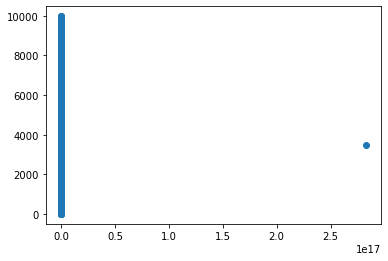

In [23]:
plt.scatter(merged['Price'], merged['rarity'])

### Outlier analysis 

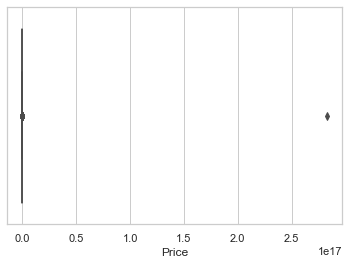

In [24]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=merged["Price"])

In [28]:
Q1 = merged['Price'].quantile(0.25)
Q3 = merged['Price'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5*IQR
lim_sup = Q3 + 1.5*IQR

In [29]:
count = 0
outliers = []

#looping through the price column to count the number of outliers and put them in a list
for i in merged['Price']:
    if (i < lim_inf) or (i > lim_sup):
        count += 1
        outliers.append(i)
print("The total number of outliers is:",count)

The total number of outliers is: 61


In [30]:
#all of the outliers
merged[merged['Price'].isin(outliers)].sort_values(by=['Price'])

,ID,rarity,Price,Symbol,rarity/price
596,2535,7237,1.907550e+06,dollar,2.635830e+02
148,2945,1350,1.978200e+06,dollar,1.465333e+03
29,8274,212,1.978200e+06,dollar,9.331132e+03
42,1119,306,1.978200e+06,dollar,6.464706e+03
59,9728,465,2.036670e+06,dollar,4.379935e+03
...,...,...,...,...,...
96,192,829,1.969439e+07,dollar,2.375681e+04
513,8229,6006,4.239000e+07,dollar,7.057942e+03
395,1552,4094,4.239283e+07,dollar,1.035487e+04
367,648,3771,5.335488e+07,dollar,1.414874e+04


In [31]:
for i in merged['Price']:       
    #calculating the median for each array
    variable_median = merged['Price'].median()
    
    #replacing the outliers by the median
    merged['Price'] = merged['Price'].apply(lambda x:variable_median if x > lim_sup or x < lim_inf else x)

In [32]:
merged.sort_values(by='rarity/price')

,ID,rarity,Price,Symbol,rarity/price
526,5465,6204,0.000000e+00,dollar,0.000000e+00
489,8520,5683,2.803000e-09,dollar,4.932254e-13
593,3368,7187,2.803000e+03,dollar,3.900097e-01
556,1859,6511,1.401500e+05,dollar,2.152511e+01
728,3541,9927,4.041180e+05,dollar,4.070898e+01
...,...,...,...,...,...
2,7265,14,1.568430e+06,dollar,1.120307e+05
4,528,29,6.768270e+05,dollar,1.298986e+05
1,7616,5,6.768270e+05,dollar,6.957612e+05
0,3953,2,6.768270e+05,dollar,4.080744e+06


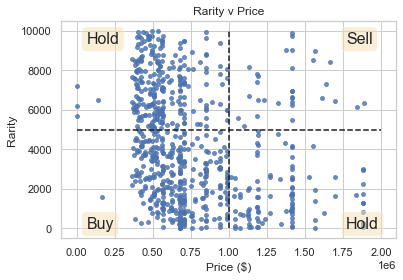

In [33]:
fig, ax = plt.subplots()

plt.scatter(merged['Price'], merged['rarity'], s=15, alpha=0.8)
plt.xlabel('Price ($)')
plt.ylabel('Rarity')
plt.title('Rarity v Price')

#plotting a horizontal and vertical black line
plt.plot([1e6, 1e6], [0, 10000], '--k')
plt.plot([0, 2e6], [5000, 5000], '--k')

#plotting text boxes
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

#text boxes names and positions
texts = ['Hold', 'Hold', 'Buy', 'Sell']
x_positions = [0.075, 0.85, 0.075, 0.85]
y_positions = [0.95, 0.10, 0.10, 0.95]

#looping for the 4 text boxes
for text, x_pos, y_pos in zip(texts, x_positions, y_positions):    
    ax.text(x_pos , y_pos, text, transform=ax.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

plt.show()

In [34]:
X = merged[['Price','rarity']]
X = np.array(X)
X

array([[6.76827e+05, 2.00000e+00],
       [6.76827e+05, 5.00000e+00],
       [1.56843e+06, 1.40000e+01],
       ...,
       [4.38030e+05, 9.92800e+03],
       [5.34114e+05, 9.97700e+03],
       [4.94550e+05, 9.97900e+03]])

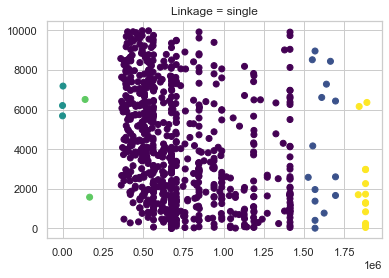

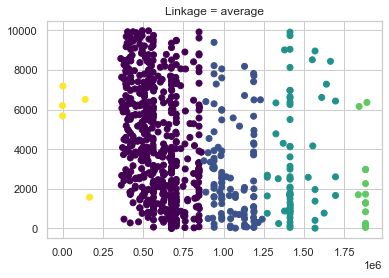

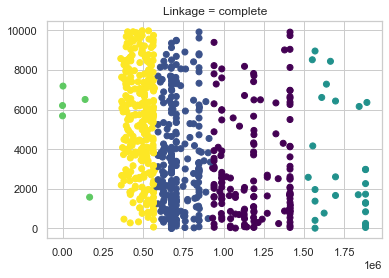

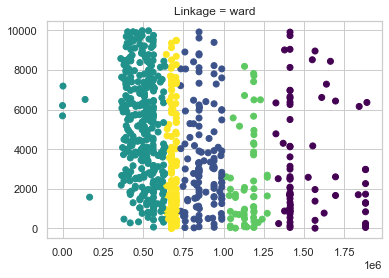

In [35]:
from sklearn.cluster import AgglomerativeClustering

linkages = ['single', 'average', 'complete', 'ward']

for linkage in linkages:

    clustering = AgglomerativeClustering(n_clusters=5, linkage=linkage).fit(X)

    labels = clustering.labels_

    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    
    plt.title(f'Linkage = {linkage}')
    
    plt.show()

In [36]:
from sklearn.cluster import KMeans

In [37]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [38]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=5, linewidths=5,
                color=cross_color, zorder=11, alpha=1)

In [39]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

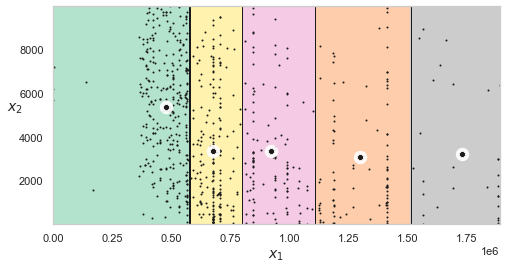

In [40]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

## Sell function

In [136]:
#function that estimates the price of an NFT, based on a subset of NFTs with similar rarity
def closest_rarity(ID):
    
    #if the specified ID is actually alreay in the Buy Now category in OpenSea, return its known price
    if ID in merged['ID'].tolist():
        price_buy_now = merged[merged['ID'] == ID]['Price'].tolist()[0]
        return f'Your NFT is already in the Buy Now section and has a price of ${price_buy_now} '
                
    else:    
        #sorting the df, indexing by ID
        apes2 = apes.sort_values(by='ID').set_index('ID')
        #fetching the rarity according the the given ID
        rarity = apes2.loc[ID, 'rarity']
        #creating a rarity range subset
        rarity_inf = rarity - 500
        rarity_sup = rarity + 500

        #filtering the merged df with the rarity range then getting the mean price
        price = merged[(merged['rarity'] > rarity_inf) & (merged['rarity'] < rarity_sup)]['Price'].mean()

        output = f'Your NFT, with ID #{ID} and a rarity ranking of {rarity} has an estimated price of $ {round(price, 0)}'

        return output
    

In [137]:
closest_rarity(58)

'Your NFT, with ID #58 and a rarity ranking of 4683 has an estimated price of $ 648384.0'